In [1]:
# Downloads wb data

#### The new approach is to <u> divide percents by 100</u> in this notebook, at download time

In [2]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [3]:
from pandas_datareader import wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from res_ind_lib import *

import os, time
from wb_api_wraper import *

# Options

In [4]:
include_remitances = True

In [5]:
#Pandas display optionsa

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.width', 200)
pd.set_option('display.precision', 10)
pd.set_option('display.max_rows', 500)


# GDP and share of income per Q

In [6]:
#World Development Indicators
gdp_pc_pp    = get_wb_mrv('NY.GDP.PCAP.pp.kd',"gdp_pc_pp")#Gdp per capita ppp
pop          = get_wb_mrv('SP.POP.TOTL'      ,"pop")#population
#ppp_over_mer = get_wb_mrv('PA.NUS.PPPC.RF',"ppp_over_mer")#conversion factor PPP over MER
gdp_pc_cd=get_wb_mrv('ny.gdp.pcap.cd'   ,"gdp_pc_cd")#gdp per capita mer
# gap2     =get_wb_mrv('1.0.PGap.2.5usd'  ,"gap2")#poverty gap at 2$
# head2    =get_wb_mrv('SI.POV.2DAY'      ,"head2")# povety count at 2$

share1   =get_wb_mrv('SI.DST.FRST.20'   ,"share1")/100#share of income bottom 20%
share2   =get_wb_mrv('SI.DST.02nd.20'   ,"share2")/100#share of income second 
share3   =get_wb_mrv('SI.DST.03rd.20'   ,"share3")/100#share of income 3rd
share4   =get_wb_mrv('SI.DST.04th.20'   ,"share4")/100#share of income 4th
share5   =get_wb_mrv('SI.DST.05th.20'   ,"share5")/100#share of income 5th

#pahc = get_wb_mrv('SH.ACS.PROB.Q2.ZS','pahc')/100   #“problems in accessing health care (all concerns) (% of women)”
# bashs = get_wb_mrv('SH.STA.BRTC.ZS','bashs') /100# Births attended by skilled health staff (% of total)
# ophe = get_wb_mrv('SH.XPD.OOPC.TO.ZS','ophe')/100   # Out-of-pocket health expenditure (% of total expenditure on health)

# plgp = get_wb_mrv('SE.PRM.PRSL.ZS','plgp')/100   #'Persistence to last grade of primary, total (% of cohort)'


#pseudo_employ = 1-get_wb_mrv("SL.UEM.TOTL.ZS","pseudo_employ")/100 # 'Unemployment, total (% of total labor force) (modeled ILO estimate)'
# unemp = get_wb_mrv("SL.UEM.TOTL.ZS","unemp")/100 # 'Unemployment, total (% of total labor force) (modeled ILO estimate)'

# Social protection and remitances

In [7]:
search_wb("coverage.*poor.*all.*ass.*").query("name=='Coverage in poorest quintile (%) - All Social Assistance '")

,id,name,source


In [8]:
poor_cov_assistance = mrv(get_wb("per_sa_allsa.cov_q1_tot"))
poor_cov_assistance

other_cov_assistance =( mrv(get_wb("per_sa_allsa.cov_q2_tot")) + mrv(get_wb("per_sa_allsa.cov_q3_tot"))+ mrv(get_wb("per_sa_allsa.cov_q4_tot")) + mrv(get_wb("per_sa_allsa.cov_q5_tot")))/4



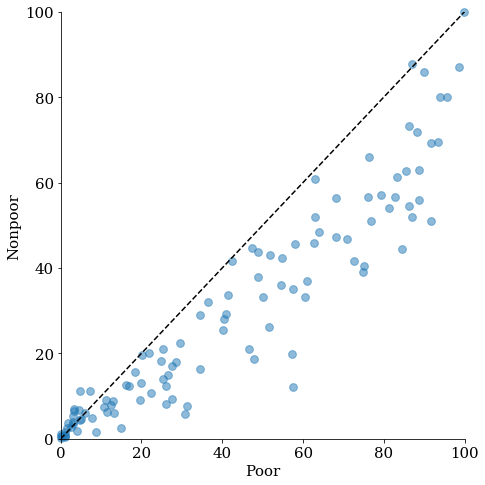

In [9]:
from fancy_plots import *

font = {'family' : 'serif',
    'weight' : 'normal',
    'size'   : 15}

plt.rc('font', **font)

pd.DataFrame([poor_cov_assistance, other_cov_assistance], index=["Poor","Nonpoor"]).T.plot.scatter(
    x="Poor", 
    y="Nonpoor", 
    s=60, 
    alpha=0.5,
    figsize=(7,7),
    clip_on=False)
plt.xlim(0,100)
plt.ylim(0,100)

plt.plot([0,100],[0,100], "--", color="black")

spine_and_ticks(plt.gca())

#savefig("img/cov_assist_p_np")

In [10]:
#Aspire

#Averages
rem1  =get_wb_series('per_pr_allpr.avt_q1_tot','rem1') #Average per capita transfer held by poorest quintile - Private Transfers   
rem2  =get_wb_series('per_pr_allpr.avt_q2_tot','rem2') # - Private Transfers 
rem3  =get_wb_series('per_pr_allpr.avt_q3_tot','rem3') # - Private Transfers 
rem4  =get_wb_series('per_pr_allpr.avt_q4_tot','rem4') # - Private Transfers 
rem5  =get_wb_series('per_pr_allpr.avt_q5_tot','rem5') # - Private Transfers 

tra1_  =get_wb_series('per_allsp.avt_q1_tot','tra1') #Average per capita transfer held by poorest quintile -All  dolars PPP per day
tra2_  =get_wb_series('per_allsp.avt_q2_tot','tra2') #Average per capita transfer held by -All 
tra3_  =get_wb_series('per_allsp.avt_q3_tot','tra3') #Average per capita transfer held by  -All 
tra4_  =get_wb_series('per_allsp.avt_q4_tot','tra4') #Average per capita transfer held by  -All 
tra5_  =get_wb_series('per_allsp.avt_q5_tot','tra5') #Average per capita transfer held by  -All 

# per_pr_allpr.adq_q1_tot


#Adequacies
ade1_remit  = get_wb_series('per_pr_allpr.adq_q1_tot', 'ade1_remit')/100 #Adequacy of benefits for Q1, Remittances
ade2_remit  = get_wb_series('per_pr_allpr.adq_q2_tot', 'ade2_remit')/100 #Adequacy of benefits for Q2, Remittances
ade3_remit  = get_wb_series('per_pr_allpr.adq_q3_tot', 'ade3_remit')/100 #Adequacy of benefits for Q3, Remittances
ade4_remit  = get_wb_series('per_pr_allpr.adq_q4_tot', 'ade4_remit')/100 #Adequacy of benefits for Q4, Remittances
ade5_remit  = get_wb_series('per_pr_allpr.adq_q5_tot', 'ade5_remit')/100 #Adequacy of benefits for Q5, Remittances

ade1_allspl = get_wb_series('per_allsp.adq_q1_tot', 'ade1_allspl')/100 #Adequacy of benefits for Q1, All Social Protection and Labor
ade2_allspl = get_wb_series('per_allsp.adq_q2_tot', 'ade2_allspl')/100 #Adequacy of benefits for Q2, All Social Protection and Labor
ade3_allspl = get_wb_series('per_allsp.adq_q3_tot', 'ade3_allspl')/100 #Adequacy of benefits for Q3, All Social Protection and Labor
ade4_allspl = get_wb_series('per_allsp.adq_q4_tot', 'ade4_allspl')/100 #Adequacy of benefits for Q4, All Social Protection and Labor
ade5_allspl = get_wb_series('per_allsp.adq_q5_tot', 'ade5_allspl')/100 #Adequacy of benefits for Q5, All Social Protection and Labor

#Coverage            
cov1_remit  = get_wb_series('per_pr_allpr.cov_q1_tot','cov1_remit')/100 # Coverage for Q1, Remittances 
cov2_remit  = get_wb_series('per_pr_allpr.cov_q2_tot','cov2_remit')/100 # Coverage for Q2, Remittances 
cov3_remit  = get_wb_series('per_pr_allpr.cov_q3_tot','cov3_remit')/100 # Coverage for Q3, Remittances 
cov4_remit  = get_wb_series('per_pr_allpr.cov_q4_tot','cov4_remit')/100 # Coverage for Q4, Remittances 
cov5_remit  = get_wb_series('per_pr_allpr.cov_q5_tot','cov5_remit')/100 # Coverage for Q5, Remittances 

cov1_allspl = get_wb_series('per_allsp.cov_q1_tot','cov1')/100 #Coverage in poorest quintile (%) -All Social Protection and Labor 
cov2_allspl = get_wb_series('per_allsp.cov_q2_tot','cov2')/100 # Coverage in 2nd quintile (%) -All Social Protection and Labor 
cov3_allspl = get_wb_series('per_allsp.cov_q3_tot','cov3')/100 # Coverage in 3rd quintile (%) -All Social Protection and Labor 
cov4_allspl = get_wb_series('per_allsp.cov_q4_tot','cov4')/100 # Coverage in 4th quintile (%) -All Social Protection and Labor 
cov5_allspl = get_wb_series('per_allsp.cov_q5_tot','cov5')/100 # Coverage in 5th quintile (%) -All Social Protection and Labor


In [11]:
if include_remitances:
    t_1 = mrv(rem1 + tra1_)
    t_2 = mrv(rem2 + tra2_)
    t_3 = mrv(rem3 + tra3_)
    t_4 = mrv(rem4 + tra4_)
    t_5 = mrv(rem5 + tra5_)

    la_1 =mrv(( cov1_allspl * ade1_allspl + cov1_remit *ade1_remit))
    la_2 =mrv(( cov2_allspl * ade2_allspl + cov2_remit *ade2_remit))
    la_3 =mrv(( cov3_allspl * ade3_allspl + cov3_remit *ade3_remit))
    la_4 =mrv(( cov4_allspl * ade4_allspl + cov4_remit *ade4_remit))
    la_5 =mrv(( cov5_allspl * ade5_allspl + cov5_remit *ade5_remit))

else:  
    t_1 = mrv( tra1_)
    t_2 = mrv( tra2_)
    t_3 = mrv( tra3_)
    t_4 = mrv( tra4_)
    t_5 = mrv( tra5_)

    la_1 =mrv(( cov1_allspl * ade1_allspl))
    la_2 =mrv(( cov2_allspl * ade2_allspl))
    la_3 =mrv(( cov3_allspl * ade3_allspl))
    la_4 =mrv(( cov4_allspl * ade4_allspl))
    la_5 =mrv(( cov5_allspl * ade5_allspl))
    
y_1= mrv(rem1 + tra1_)/la_1
y_2= mrv(rem2 + tra2_)/la_2
y_3= mrv(rem3 + tra3_)/la_3
y_4= mrv(rem4 + tra4_)/la_4
y_5= mrv(rem5 + tra5_)/la_5


In [12]:
import numpy as np

In [13]:
pop

country
Afghanistan                                               34656032.0
Albania                                                    2876101.0
Algeria                                                   40606052.0
American Samoa                                               55599.0
Andorra                                                      77281.0
Angola                                                    28813463.0
Antigua and Barbuda                                         100963.0
Arab World                                               406452690.0
Argentina                                                 43847430.0
Armenia                                                    2924816.0
Aruba                                                       104822.0
Australia                                                 24127159.0
Austria                                                    8747358.0
Azerbaijan                                                 9762274.0
Bahamas, The              

In [14]:
(4*t_1*pop).sum()/((t_2+t_3+t_4+t_5)*pop).sum()

0.3237961539324345

In [15]:
x   =  (pd.DataFrame([t_1, t_2, t_3, t_4, t_5,pop], index=["q1","q2","q3","q4","q5", "popu"]).T).dropna()



print("in the ", x.shape[0], "countries where ASPIRE reports data, poor people receive only", 100* (4*x.q1*x.popu).sum()/((x.q2+x.q3+x.q4+x.q5)*x.popu).sum(), "percent of what nonpoor people receive from public and private transfers")

in the  106 countries where ASPIRE reports data, poor people receive only 32.404752166231575 percent of what nonpoor people receive from public and private transfers


In [16]:
#These countries seem to get more than 100% income from transfers acording to ASPIRE
ade1_remit[ade1_remit>.95]

country       year
Armenia       2014    1.1220440728
              2012    1.1801605907
              2011    0.9808063494
Burkina Faso  2003    1.3056654506
Cameroon      2007    2.6710968894
Georgia       2011    3.8265705594
Lesotho       2010    3.0217168121
Mauritania    2014    1.1267036533
Name: ade1_remit, dtype: float64

# financial inclusion

In [17]:
search_wb("Saved at a financial institution");

In [18]:
#Findex                                 
loan40   =get_wb_mrv('WP11651_5.8'      ,"loan40")/100 #Loan in the past year                                  
loan60   =get_wb_mrv('WP11651_5.9'      ,"loan60")/100 #Loaan in the past year                                  
saved40  =get_wb_mrv('WP_time_04.8'        ,"saved40")/100 #Saved at a financial institution in the past year, bottom 40%      
saved60  =get_wb_mrv('WP_time_04.9'        ,"saved60")/100 #Saved this year, income, top 60% (% age 15+)


In [19]:
saved60.head()

country
Afghanistan    0.04460866
Albania        0.09645449
Algeria        0.16478050
Angola         0.22208070
Argentina      0.06069045
Name: saved60, dtype: float64

# urbanization rate

In [20]:
search_wb("Urban population ")

,id,name,source
4961,EN.POP.EL5M.UR.ZS,Urban population living in areas where elevation is below 5 meters (% of total population),World Development Indicators
9587,SH.H2O.SAFE.UR.ZS,"Improved water source, urban (% of urban population with access)",World Development Indicators
9749,SH.STA.ACSN.UR,"Improved sanitation facilities, urban (% of urban population with access)",World Development Indicators
10652,SP.URB.GROW,Urban population growth (annual %),World Development Indicators
10659,SP.URB.TOTL.IN.ZS,Urban population (% of total),World Development Indicators


In [21]:
urbanization_rate = get_wb_mrv("SP.URB.TOTL.IN.ZS","urbanization_rate")/100

# New dataframe

In [22]:
df = pd.concat([gdp_pc_pp,pop,share1,urbanization_rate,gdp_pc_cd],axis=1)
df.index.names = ['country']

In [23]:
#We take only savings as an insurance against destitution
df["axfin_p"] = saved40
df["axfin_r"] = saved60

In [24]:
#Comptues share of income from transfers

df["social_p"]=la_1
df["social_r"]=(t_2+t_3+t_4+t_5)/(y_2+y_3+y_4+y_5)


In [25]:
df[df.social_p>0.6].social_p

country
Armenia         0.7336326637
Azerbaijan      0.8571289621
Belarus         0.7131045570
Georgia         0.9832011784
Ghana           0.6257034541
Hungary         0.8014838871
Lithuania       0.7601398504
South Africa    0.7327359556
Uruguay         0.6301863446
Name: social_p, dtype: float64

In [26]:
df[df.social_r>0.3].social_r

country
Armenia       0.3171795510
Azerbaijan    0.3860532955
Belarus       0.3857459292
Georgia       0.5428108927
Hungary       0.3974498381
Mauritius     0.3280153838
Moldova       0.3577664586
Montenegro    0.3342241905
Poland        0.3946498977
Romania       0.4061917770
Serbia        0.3624857510
Ukraine       0.3852444834
Uruguay       0.3778652067
Name: social_r, dtype: float64

In [27]:
df.ix["Georgia"]

gdp_pc_pp            9.2672990037e+03
pop                  3.7193000000e+06
share1               5.5900000000e-02
urbanization_rate    5.3826000000e-01
gdp_pc_cd            3.8536499035e+03
axfin_p              1.1648850000e-02
axfin_r              8.0633930000e-03
social_p             9.8320117844e-01
social_r             5.4281089274e-01
Name: Georgia, dtype: float64

# Manual additions

In [29]:
#GDP per capita from google (GDP per capita plays no role in the indicator. only usefull to plot the data)
df.ix["Argentina","gdp_pc_pp"]=18600/10700 * 10405.
df.ix["Syrian Arab Republic","gdp_pc_pp"]=5100/10700 * 10405.

#assume these countries with recent conflicts have bad access to basic education
#df.ix["Iraq"]["plgp"] = df.plgp.min()

#assumes these wealthy countries have good access to basic education and basic health care
# countries = ['Austria',  'Belgium',  'Denmark',  'France',  'Greece',  'Spain',  'Sweden',  'United Kingdom'] 
# df.ix[countries,"bashs"]=df.bashs.max()
# df["axhealth"]=(df.bashs+(1-df.ophe))/2


# countries = ['Australia', 'Canada', 'France', 'Ireland', 'United Kingdom', 'United States']
# df.ix[countries,"plgp"]=df.plgp.max()


In [30]:
#for SIDS, manual addition from online research

In [34]:
manual_additions_sids = pd.read_csv("sids data/sids_missing_data_manual_input.csv",index_col="country")

In [37]:
df = df.fillna(manual_additions_sids)

In [38]:
print(df.dropna().shape)

(91, 9)


# output

In [39]:
print(df.dropna().shape)
df.dropna(how="all",inplace=True)
df.to_csv("inputs/wb_data.csv", encoding="utf8")

(91, 9)


In [ ]:
#